### Some further cleaning of the dataset
##### Based on the first cleaning script: now make more false positive removal

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
import re
coal_data_filtered_nodup = pd.read_csv('/Users/giacomoraederscheidt/Dropbox/Paper_Giacomo_Lotti/0 Data/coal_data_filtered_nodup_cleaned.csv')

# Removing the false positives detected with first topic model results!
# Especially relate to cooking on coals, etc.: 
#list_false_positives = ["over hot coals", "cooking on coals", "medium coals" "cooking on the coals",
#                       "coal for cooking", "hot coals", "into the coals" "on the coals", "coal stove",
#                       "cooked on coals", "coal-fired oven", "coal-roasted", "charcoal"]

# New list based on results of dtm
list_false_positives = [
    "over hot coals",
    "cooking on coals",
    "medium coals",
    "cooking on the coals",
    "coal for cooking",
    "hot coals",
    "into the coals",
    "on the coals",
    "coal stove",
    "cooked on coals",
    "coal-fired oven",
    "coal-roasted",
    "charcoal",
    "on the coals",
    "braii coals",
    "braii coal",
    "coal-black",
    "handful of coals",
    "top of the coals",
    "the coals",
    "over coals",
    "smoky coals",
    "burn the resin with coal",
    "over medium coals",
    "boss of the coals",
    "drums of coals",
    "stove with the coal",
    "bed of coals",
    "stoking the coals",
    "coal fires over dover stoves",
    "coal to paint",
    "the cast-iron stove is fired by coal",
    "walk on live coal",
    "as if she was coal",
    "wood and coal",
    "burnt on coals",
    "canaries in the coal",
    "coal city wizards",
    "coal city",
    "coal city boys",
    "walk over burning coals",
    "dark as coal"
]

# Filtering articles that contain the word 'coal'
#coal_data_filtered_nodup = coal_data_filtered_nodup[coal_data_filtered_nodup['Article_Text'].str.contains('coal', case=False, na=False)]

# Function to check if any false positive phrases are in the text
def contains_false_positives(text):
    return any(phrase in text.lower() for phrase in list_false_positives)

# Counting the number of false positive articles
false_positives_count = coal_data_filtered_nodup['Article_Text'].apply(contains_false_positives).sum()
print(false_positives_count)
# Check the articles
false_positives = coal_data_filtered_nodup[coal_data_filtered_nodup['Article_Text'].apply(contains_false_positives)]
for i, article in false_positives.head(2).iterrows():
    print(f"Article {i + 1}:\n{article['Article_Text']}\n")

479
Article 18:
It\'s serenely silent as I hike down the canyon walls. The only sounds are the crunch of my boots on the boulders, the occasional twitter of a bird and the gentle tumbling of the river. High above, towering orange cliffs loom, outlined against the deep blue sky. It\'s a hot morning, so I stop for a swim. The cold water refreshes me instantly and I linger, soothing my muscles. Our group is spread out and I hike on alone, feeling small and insignificant in this vast space. Namibia\'s Fish River Canyon is a harsh and beautiful place. Purported to be the second largest of its kind in the world after the Grand Canyon in the US, it measures approximately 160km in length, stretching southwards from Seeheim to the Orange River. The five- or six-day hike that penetrates its base is strenuous, winding through 85km of jaw-dropping scenery from the Hobas viewpoint to the spa resort at Ai-Ais. There is no defined path to follow - trailists have to clamber over boulders, climb embank

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
import re
coal_data_filtered_nodup = pd.read_csv('/Users/giacomoraederscheidt/Dropbox/Paper_Giacomo_Lotti/0 Data/coal_data_filtered_nodup_cleaned.csv')

# Removing the false positives detected with first topic model results!
# Especially relate to cooking on coals, etc.: 
#list_false_positives = ["over hot coals", "cooking on coals", "medium coals" "cooking on the coals",
#                       "coal for cooking", "hot coals", "into the coals" "on the coals", "coal stove",
#                       "cooked on coals", "coal-fired oven", "coal-roasted", "charcoal"]

# New list based on results of dtm
list_false_positives = [
    "over hot coals",
    "cooking on coals",
    "medium coals",
    "cooking on the coals",
    "coal for cooking",
    "hot coals",
    "into the coals",
    "on the coals",
    "coal stove",
    "cooked on coals",
    "coal-fired oven",
    "coal-roasted",
    "charcoal",
    "on the coals",
    "braii coals",
    "braii coal",
    "coal-black",
    "handful of coals",
    "top of the coals",
    "the coals",
    "over coals",
    "smoky coals",
    "burn the resin with coal",
    "over medium coals",
    "boss of the coals",
    "drums of coals",
    "stove with the coal",
    "bed of coals",
    "stoking the coals",
    "coal fires over dover stoves",
    "coal to paint",
    "the cast-iron stove is fired by coal",
    "walk on live coal",
    "as if she was coal",
    "wood and coal",
    "burnt on coals",
    "canaries in the coal",
    "coal city wizards",
    "coal city",
    "coal city boys",
    "walk over burning coals",
    "dark as coal"
]

# Filtering articles that contain the word 'coal'
#coal_data_filtered_nodup = coal_data_filtered_nodup[coal_data_filtered_nodup['Article_Text'].str.contains('coal', case=False, na=False)]

# Function to check if any false positive phrases are in the text
def contains_false_positives(text):
    return any(phrase in text.lower() for phrase in list_false_positives)

# Counting the number of false positive articles
false_positives_count = coal_data_filtered_nodup['Article_Text'].apply(contains_false_positives).sum()

# Check the articles
false_positives = coal_data_filtered_nodup[coal_data_filtered_nodup['Article_Text'].apply(contains_false_positives)]
for i, article in false_positives.head(2).iterrows():
    print(f"Article {i + 1}:\n{article['Article_Text']}\n")


# Further filter the DataFrame to exclude rows with false positive phrases
coal_data_filtered_nodup = coal_data_filtered_nodup[~coal_data_filtered_nodup['Article_Text'].apply(contains_false_positives)]

# Display the number of false positive articles
print(f"Number of false positive articles: {false_positives_count}")


print(coal_data_filtered_nodup)
print("\nOverview of articles dropped in the first step:")
for i, article in false_positives.head(100).iterrows():
    print(f"Dropped Article {i + 1}:")
    print(article['Article_Text'])
    print("\n")


# to count "coal"- occurences in each text
def count_coal_occurrences(text):
    return text.lower().count('coal')

# After inspection: coalface and over the coals were (rarely) mentioned in context of coal as energy source. To
# not loose relevant articles I only eliminate articles containing these words AND in which the word "coal" occurs
# less than 3 times. Manual inspection of results support that approach. 
articles_dropped = []

# Iterate through rows to identify articles to drop
for index, row in coal_data_filtered_nodup.iterrows():
    if any(term in row['Article_Text'].lower() for term in ["coal face", "coalface"]):
        coal_count = count_coal_occurrences(row['Article_Text'])
        if coal_count < 3:
            articles_dropped.append(row['Article_Text'])  # Store the dropped article
            coal_data_filtered_nodup = coal_data_filtered_nodup.drop(index)  # Drop the row from DataFrame

# Print the number of dropped articles
print(f"Number of dropped articles: {len(articles_dropped)}")

# Print overview of dropped articles
print("\nOverview of dropped articles:")
for i, article in enumerate(articles_dropped[:300]):  # Print the first two dropped articles
    print(f"Dropped Article {i + 1}:")
    print(article)
    print("\n")
    
print(coal_data_filtered_nodup)

Article 18:
It\'s serenely silent as I hike down the canyon walls. The only sounds are the crunch of my boots on the boulders, the occasional twitter of a bird and the gentle tumbling of the river. High above, towering orange cliffs loom, outlined against the deep blue sky. It\'s a hot morning, so I stop for a swim. The cold water refreshes me instantly and I linger, soothing my muscles. Our group is spread out and I hike on alone, feeling small and insignificant in this vast space. Namibia\'s Fish River Canyon is a harsh and beautiful place. Purported to be the second largest of its kind in the world after the Grand Canyon in the US, it measures approximately 160km in length, stretching southwards from Seeheim to the Orange River. The five- or six-day hike that penetrates its base is strenuous, winding through 85km of jaw-dropping scenery from the Hobas viewpoint to the spa resort at Ai-Ais. There is no defined path to follow - trailists have to clamber over boulders, climb embankment

Number of false positive articles: 479
      Unnamed: 0.1  Unnamed: 0  \
0                2         168   
1                3         261   
2                4         263   
3                5         360   
4                6         361   
...            ...         ...   
8510         24465       82547   
8511         24466       82917   
8512         24467       84291   
8513         24468       84336   
8514         24470       85572   

                                           Jurisdiction  Location ContentType  \
0                                         International       NaN        News   
1                                         International       NaN        News   
2     U.S. Federal; International; Massachusetts; Wa...       NaN        News   
3                                         International       NaN        News   
4                                         International       NaN        News   
...                                                 ...       ... 

Number of dropped articles: 111

Overview of dropped articles:
Dropped Article 1:
Just six days out from the FNB Stadium showdown with the All Blacks, John Smit is closing in on his century of Test caps. Unlike the batsman in the nervous nineties he is sure to certain to reach three figures (unless the hamstring strain that kept him from training last week intensifies), but the match is shaping up to be as much a watershed as it is a milestone for the illustrious Springbok captain. Smit will not have been impervious to the growing clamour from disappointed fans that he is too old, too unfit and not suited to the direction in which the game is headed. He might even give it all a wry smile, shrug his shoulders and wistfully say to himself: "Here we go again." Smit has been proving himself to the Springbok public for years now - he has variously been criticised as being inferior to Lukas van Biljon, Gary Botha, Schalk Brits and Bismarck du Plessis, but has always rolled up his sleeves at 

In [24]:
# Define the list of keywords
list_potential_fp = ["music", "jazz", "grill", "cooking", "cook", "football", "sport", "concert", "charcoal"]

# Create a boolean mask indicating whether each article contains any of the keywords
mask = coal_data_filtered_nodup['Article_Text'].str.contains('|'.join(list_potential_fp), case=False)

# Filter the DataFrame based on the mask
filtered_articles = coal_data_filtered_nodup[mask]

# Print the filtered articles
for i, article in filtered_articles.head(30).iterrows():
    print(f"Article {i + 1}:\n{article['Article_Text']}\n")


Article 6:
Eskom has moved to calm critics of its preferential pricing deals by confirming it is renegotiating long-term contracts with an aluminium producer and a mining house. The announcement this week that the electricity utility had two customers on special deals through which they paid less for energy than other industries and consumers, erupted in a row: Cosatu threatening to mobilise its members and the Cape Chamber of Commerce called for a full investigation into the so-called sweetheart deals. The deals were shrouded in secrecy and apparently not disclosed to the National Energy Regulator when Eskom applied for its three-year, 35 percent increase. Eskom officials had told Parliament that its key industrial customers paid lower rates for electricity through special agreements, but that details of these contracts were confidential. Andrew Etzinger, Eskom spokesman, told The Sunday Independent that contrary to recent speculation the utility did not have special contracts in plac

In [ ]:
# Removing articles with zero occurences of coal

In [36]:
coal_data_filtered_nodup = coal_data_filtered_nodup[coal_data_filtered_nodup['Article_Text'].str.contains('coal', case=False, na=False)]


In [9]:
# save cleaned datafrmae
coal_data_filtered_nodup.to_csv('/Users/giacomoraederscheidt/Dropbox/Paper_Giacomo_Lotti/0 Data/coal_data_filtered_nodup_cleaned3.csv', index=False)


In [3]:
#import pandas as pd
coal_data_filtered_nodup = pd.read_csv('/Users/giacomoraederscheidt/Dropbox/Paper_Giacomo_Lotti/0 Data/coal_data_filtered_nodup_cleaned.csv')


In [3]:
# Creating a new table with publication counts, average word counts, and median word counts
publication_stats = coal_data_filtered_nodup.groupby('News Outlet').agg(
    Article_Count=('News Outlet', 'size'),
    Average_Word_Count=('WordLength', 'mean'),
    Median_Word_Count=('WordLength', 'median')
).reset_index()

# Calculate total number of articles
total_articles = publication_stats['Article_Count'].sum()

# Add total articles to the DataFrame
publication_stats.loc[len(publication_stats)] = ['Total', total_articles, None, None]



# Displaying the new table
print(publication_stats)

                                   News Outlet  Article_Count  \
0                  Business Day (South Africa)           1182   
1                Daily Dispatch (South Africa)            556   
2                               Daily Maverick              2   
3                    Daily News (South Africa)            486   
4                                    Daily Sun             23   
5                Financial Mail (South Africa)            776   
6                              Mail & Guardian           1061   
7                          Post (South Africa)            138   
8                       Sowetan (South Africa)            400   
9                  Sunday Times (South Africa)           1126   
10               Sunday Tribune (South Africa)            279   
11                                Sunday World             48   
12                 Sunday World (South Africa)             49   
13  The Independent on Saturday (South Africa)             93   
14                  The M

/var/folders/b2/b80y7bln16n67zwg12k_n4mc0000gn/T/ipykernel_30373/4204878203.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  coal_data_filtered_nodup['YearMonth'] = coal_data_filtered_nodup['Date'].dt.to_period('M')


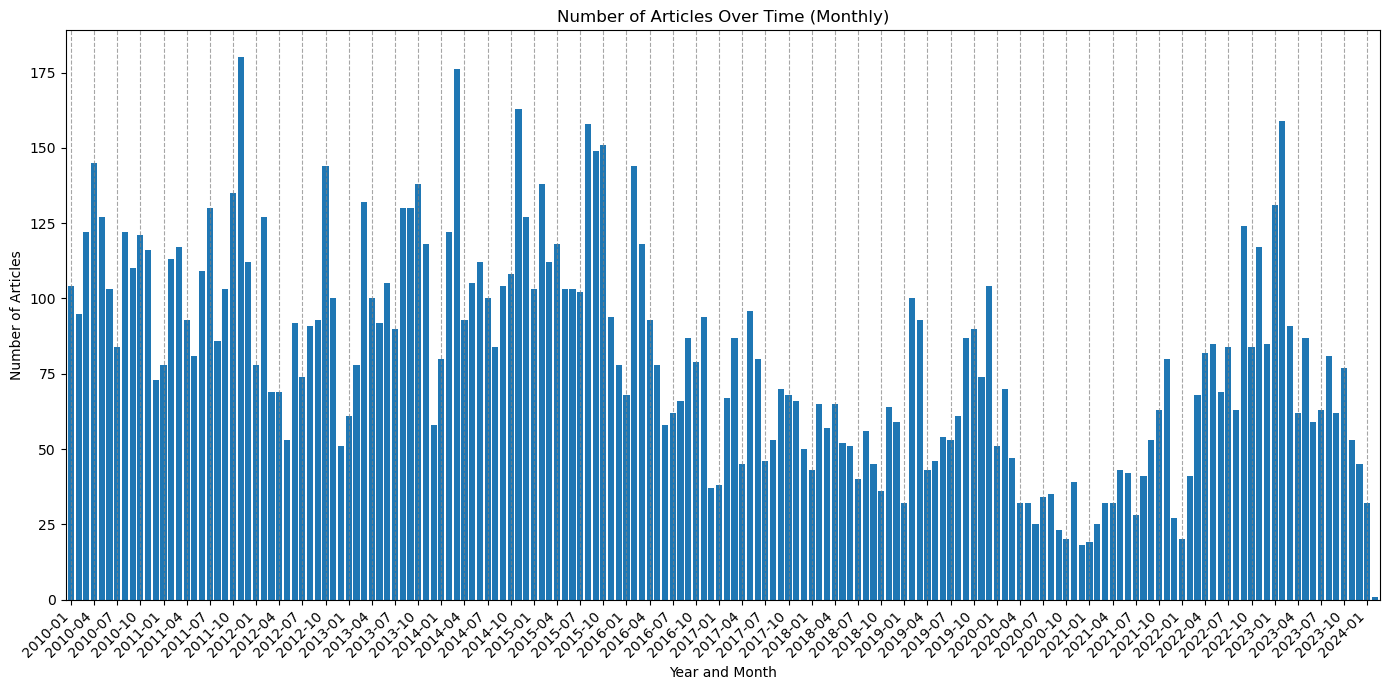

/var/folders/b2/b80y7bln16n67zwg12k_n4mc0000gn/T/ipykernel_30373/4204878203.py:29: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  coal_data_filtered_nodup['YearMonth'] = coal_data_filtered_nodup['Date'].dt.to_period('Y')


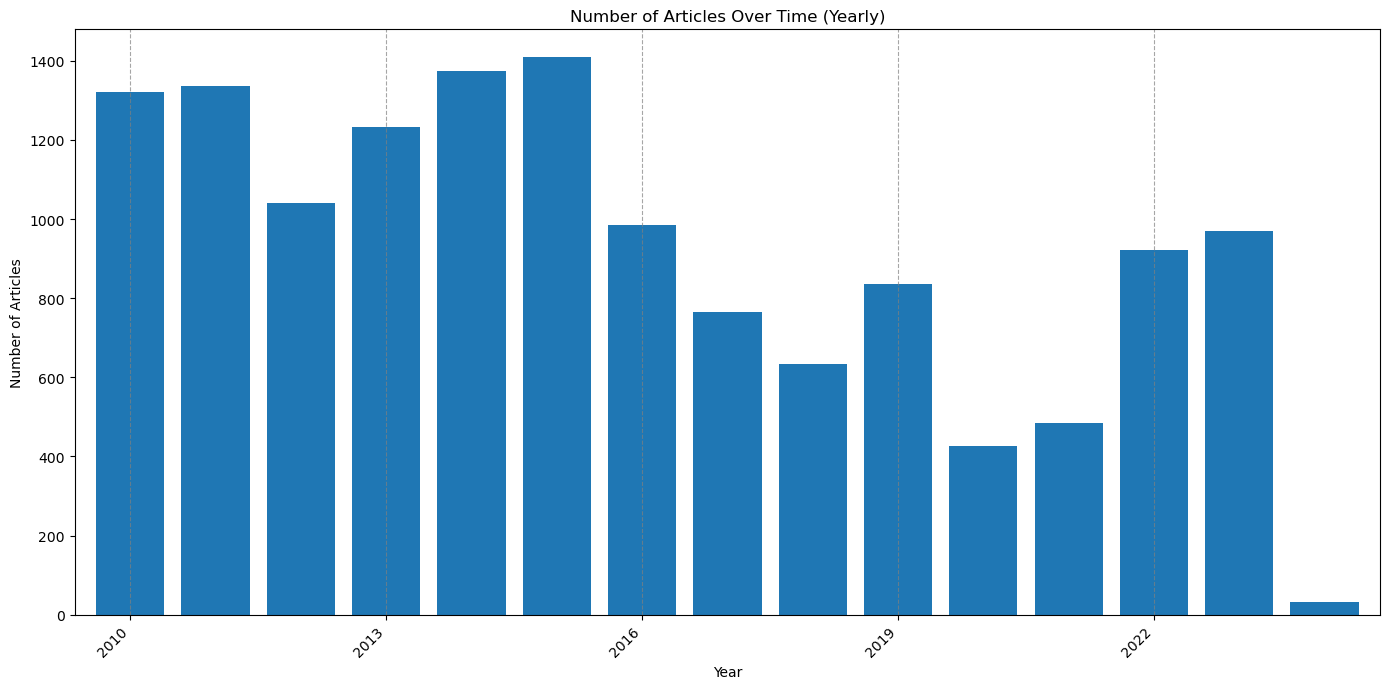

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
import re

coal_data_filtered_nodup['Date'] = pd.to_datetime(coal_data_filtered_nodup['Date'])

# Generating a histogram of articles over time on a monthly basis
coal_data_filtered_nodup['YearMonth'] = coal_data_filtered_nodup['Date'].dt.to_period('M')
plt.figure(figsize=(14, 7))  # Increased figure size
ax = coal_data_filtered_nodup.groupby('YearMonth').size().plot(kind='bar', width=0.8)
plt.title('Number of Articles Over Time (Monthly)')
plt.xlabel('Year and Month')
plt.ylabel('Number of Articles')
# Setting a ticker to control the density of the x-axis labels
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation=45, ha='right')  # Adjusting rotation and alignment
plt.grid(axis='x', linestyle='--', color='gray', alpha=0.7)
plt.tight_layout()
plt.show()



# Generating a histogram of articles over time on a Yearly basis
coal_data_filtered_nodup['YearMonth'] = coal_data_filtered_nodup['Date'].dt.to_period('Y')
plt.figure(figsize=(14, 7))  # Increased figure size
ax = coal_data_filtered_nodup.groupby('YearMonth').size().plot(kind='bar', width=0.8)
plt.title('Number of Articles Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
# Setting a ticker to control the density of the x-axis labels
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation=45, ha='right')  # Adjusting rotation and alignment
plt.grid(axis='x', linestyle='--', color='gray', alpha=0.7)
plt.tight_layout()
plt.show()

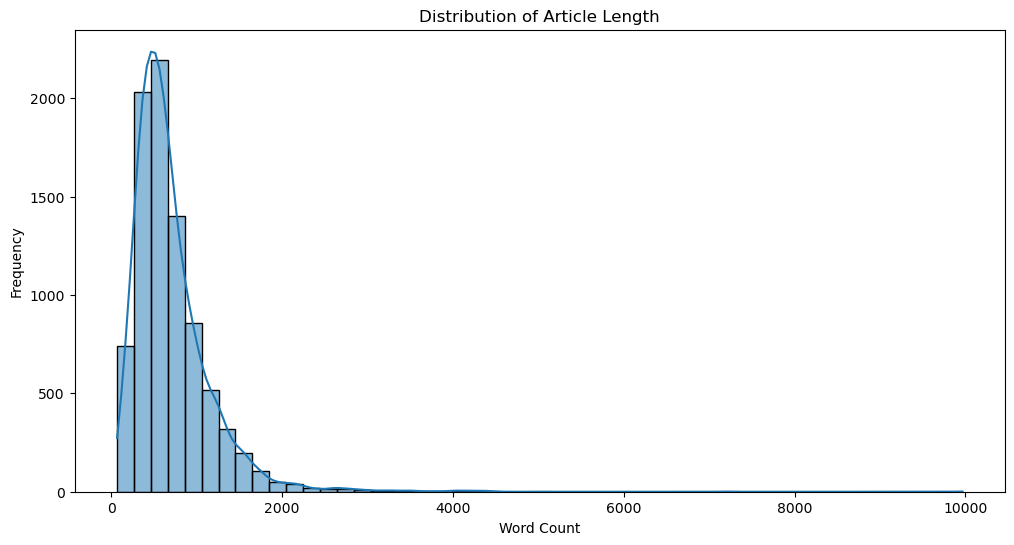

In [15]:
# Generating a histogram for the distribution of article length
plt.figure(figsize=(12, 6))
sns.histplot(coal_data_filtered_nodup['WordLength'], bins=50, kde=True)
plt.title('Distribution of Article Length')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [2]:
# Convert all articles to lowercase for case-insensitive search
coal_data_filtered_nodup['Article_Text'] = coal_data_filtered_nodup['Article_Text'].str.lower()

# Count occurrences of "coal" in articles
coal_occurrences_count = coal_data_filtered_nodup['Coal_Occurrences'].value_counts().sort_index()

# Display the distribution
print("Occurrences\tNumber of Articles")
print("---------------------------------")
for occurrences, count in coal_occurrences_count.items():
    print(f"{occurrences}\t\t{count}")


# Count occurrences of the word "coal"
coal_data_filtered_nodup['Coal_Occurrences'] = coal_data_filtered_nodup['Article_Text'].str.count('coal')
# Define bins for histogram
bins = list(range(21)) + [21]  # Individual bins for each count up to 20, and a single bin for everything above 20

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(coal_data_filtered_nodup['Coal_Occurrences'], bins=bins, kde=True)
plt.title('Distribution of "Coal" Occurrences in Articles')
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency')
plt.show()

NameError: name 'coal_data_filtered_nodup' is not defined

/var/folders/b2/b80y7bln16n67zwg12k_n4mc0000gn/T/ipykernel_19589/2388022404.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  coal_data_filtered_nodup['YearMonth'] = coal_data_filtered_nodup['Date'].dt.to_period('Y')


Total mentions of 'JETP': 61


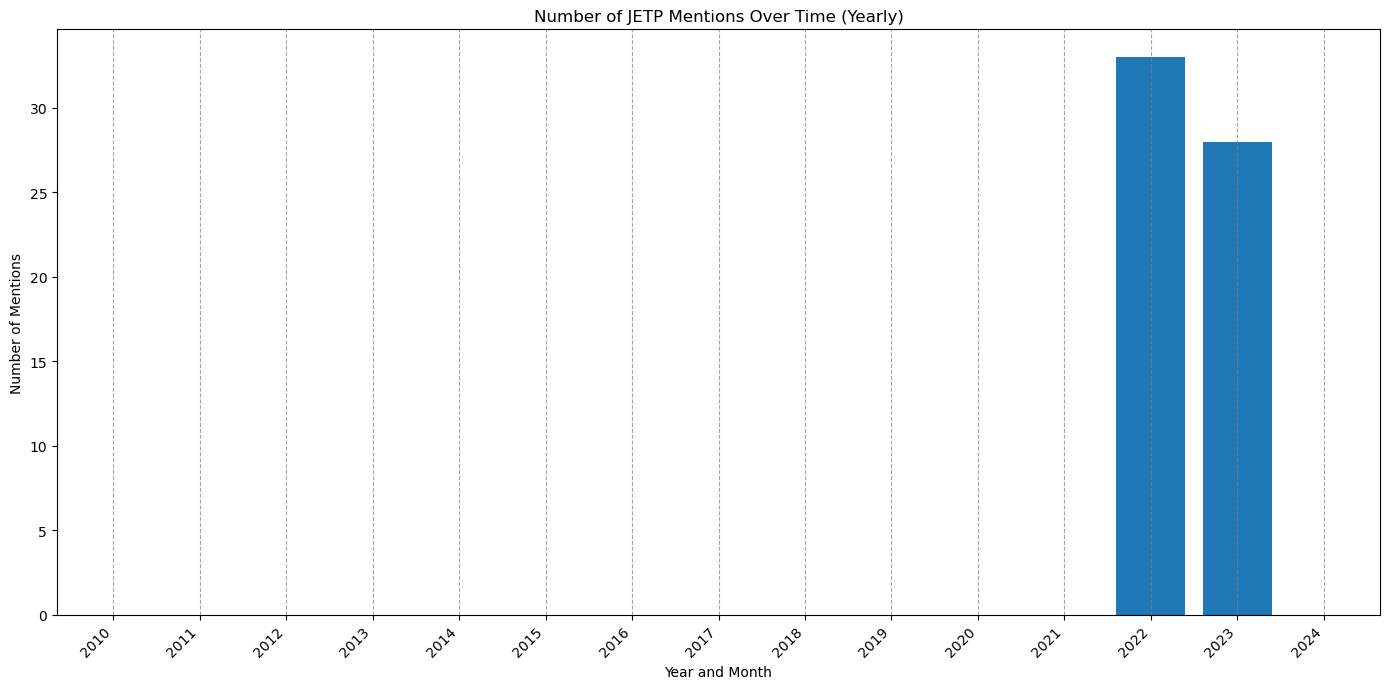

In [19]:
coal_data_filtered_nodup['Date'] = pd.to_datetime(coal_data_filtered_nodup['Date'])

# Extract year and month from the 'Date' column
coal_data_filtered_nodup['YearMonth'] = coal_data_filtered_nodup['Date'].dt.to_period('Y')

# Extract mentions of "JETP" from the 'Article_Text' column
coal_data_filtered_nodup['JETP_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bJETP\b', flags=re.IGNORECASE)
total_jetp_mentions = coal_data_filtered_nodup['JETP_Mentions'].sum()
print("Total mentions of 'JETP':", total_jetp_mentions)

# Group by YearMonth and sum the mentions of "JETP" for each month
jetp_mentions_per_month = coal_data_filtered_nodup.groupby('YearMonth')['JETP_Mentions'].sum()

# Plot the histogram
plt.figure(figsize=(14, 7))  # Increased figure size
jetp_mentions_per_month.plot(kind='bar', width=0.8)
plt.title('Number of JETP Mentions Over Time (Yearly)')
plt.xlabel('Year and Month')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45, ha='right')  # Adjusting rotation and alignment
plt.grid(axis='x', linestyle='--', color='gray', alpha=0.7)
plt.tight_layout()
plt.show()

There are about 60 (90 if include regional newspapers)  mentions of JETP in the articles (including articles with multiple mentions)

/var/folders/b2/b80y7bln16n67zwg12k_n4mc0000gn/T/ipykernel_19589/2954267103.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  coal_data_filtered_nodup['YearMonth'] = coal_data_filtered_nodup['Date'].dt.to_period('Y')


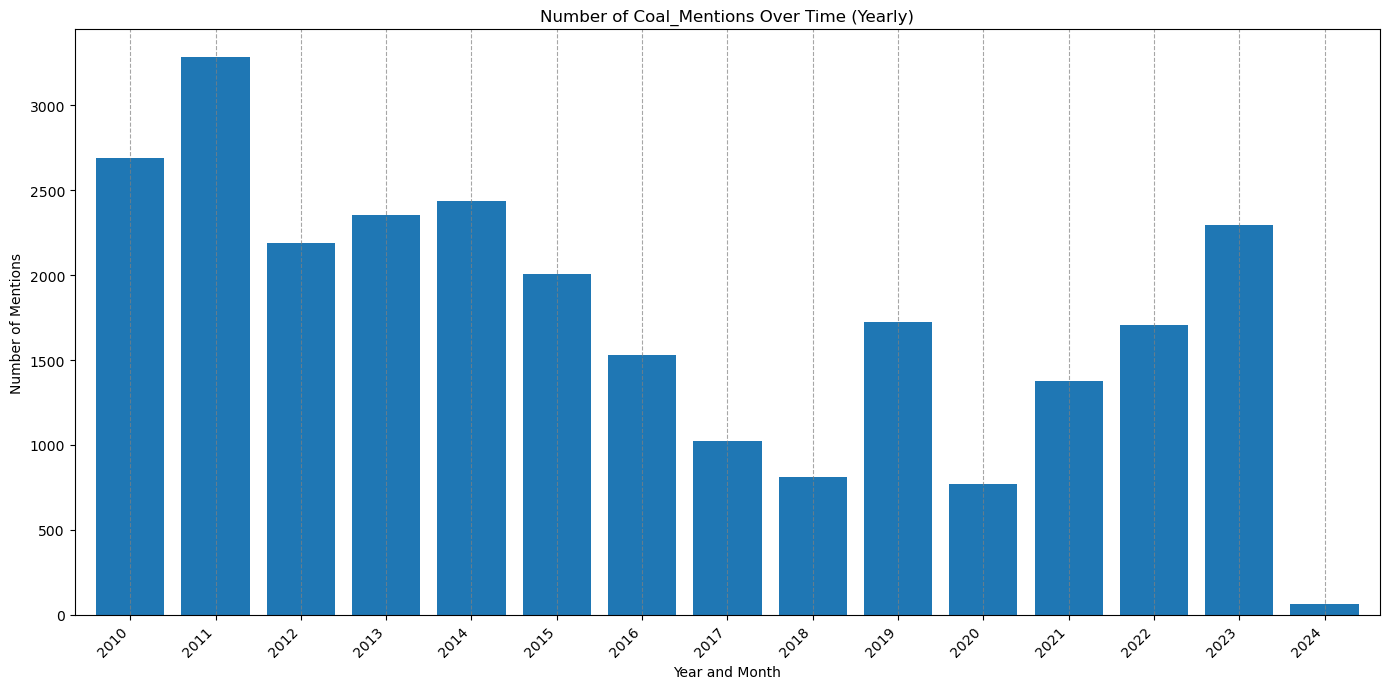

In [20]:
coal_data_filtered_nodup['Date'] = pd.to_datetime(coal_data_filtered_nodup['Date'])

# Extract year and month from the 'Date' column
coal_data_filtered_nodup['YearMonth'] = coal_data_filtered_nodup['Date'].dt.to_period('Y')

# Extract mentions of "JETP" from the 'Article_Text' column
coal_data_filtered_nodup['Coal_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count('Coal', flags=re.IGNORECASE)

# Group by YearMonth and sum the mentions of "JETP" for each month
jetp_mentions_per_month = coal_data_filtered_nodup.groupby('YearMonth')['Coal_Mentions'].sum()

# Plot the histogram
plt.figure(figsize=(14, 7))  # Increased figure size
jetp_mentions_per_month.plot(kind='bar', width=0.8)
plt.title('Number of Coal_Mentions Over Time (Yearly)')
plt.xlabel('Year and Month')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45, ha='right')  # Adjusting rotation and alignment
plt.grid(axis='x', linestyle='--', color='gray', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/b2/b80y7bln16n67zwg12k_n4mc0000gn/T/ipykernel_40047/2411903738.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  coal_data_filtered_nodup['YearMonth'] = coal_data_filtered_nodup['Date'].dt.to_period('M')


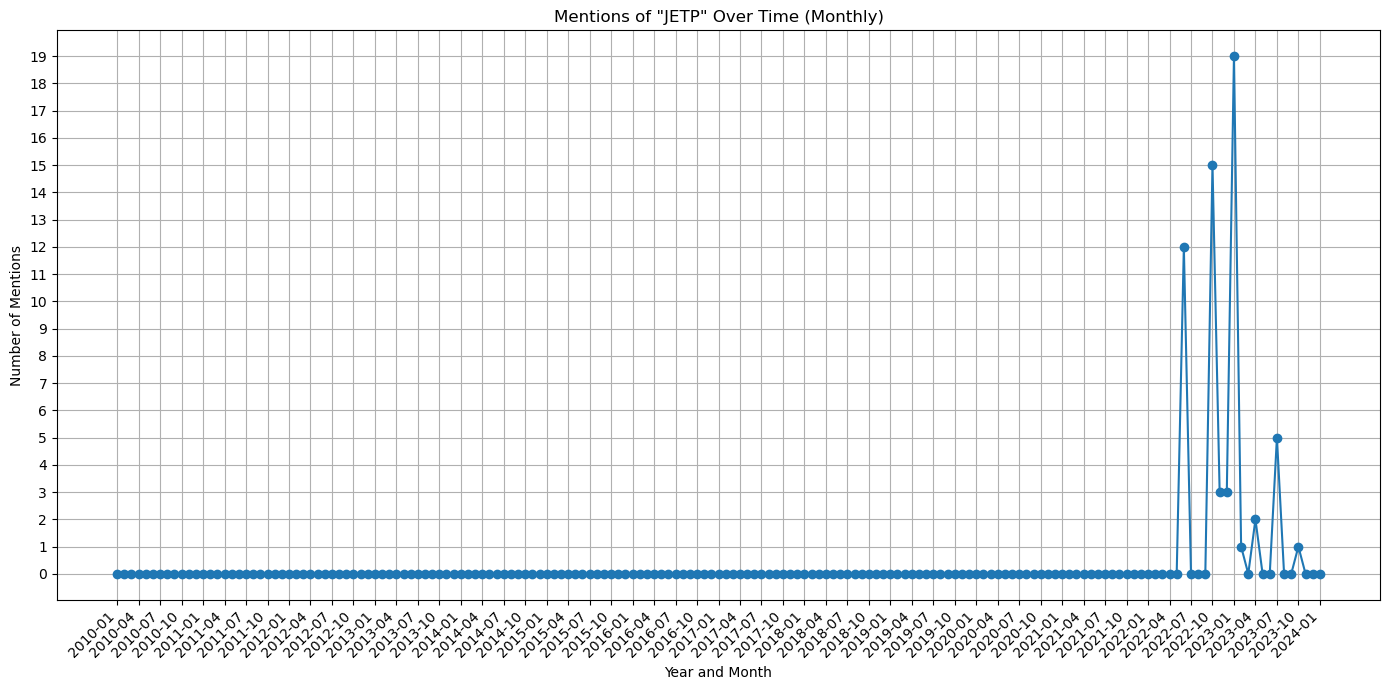

In [11]:
# Convert 'Date' column to datetime format
coal_data_filtered_nodup['Date'] = pd.to_datetime(coal_data_filtered_nodup['Date'])

# Extract year and month from the 'Date' column
coal_data_filtered_nodup['YearMonth'] = coal_data_filtered_nodup['Date'].dt.to_period('M')

# Extract mentions of "JETP" from the 'Article_Text' column
coal_data_filtered_nodup['JETP_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bJETP\b', flags=re.IGNORECASE)

# Group by YearMonth and sum the mentions of "JETP" for each month
jetp_mentions_per_month = coal_data_filtered_nodup.groupby('YearMonth')['JETP_Mentions'].sum()

# Plot the mentions of "JETP" over time

plt.figure(figsize=(14, 7))
plt.plot(jetp_mentions_per_month.index.astype(str), jetp_mentions_per_month.values, marker='o', linestyle='-')
plt.title('Mentions of "JETP" Over Time (Monthly)')
plt.xlabel('Year and Month')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45, ha='right')  # Adjusting rotation and alignment
x_ticks = jetp_mentions_per_month.index.astype(str)[::3]
plt.xticks(x_ticks, rotation=45, ha='right')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:d}'.format(int(x))))
plt.tight_layout()
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

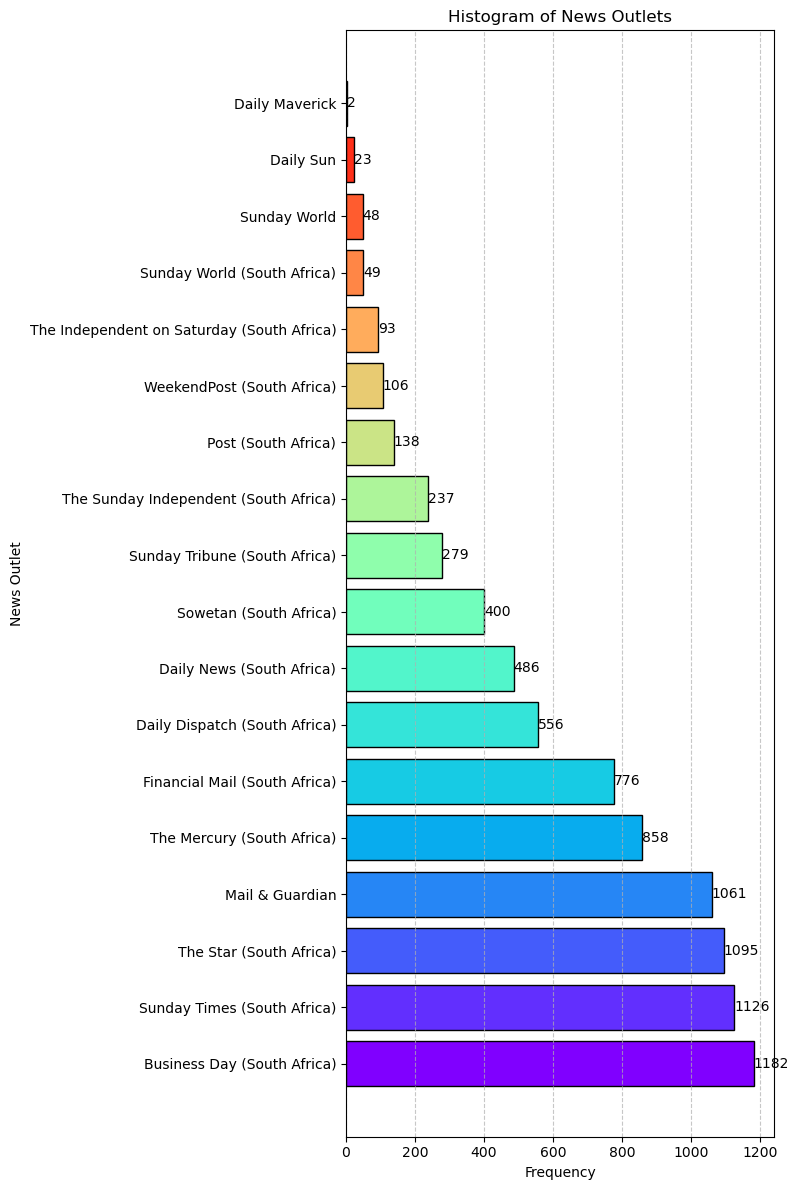

In [12]:
import numpy as np

# Get the unique values of the 'News Outlet' column
unique_outlets = coal_data_filtered_nodup['News Outlet'].unique()

# Count the frequency of each outlet
outlet_counts = coal_data_filtered_nodup['News Outlet'].value_counts()

# Plot histogram with outlets on the y-axis
plt.figure(figsize=(8, 12))  # Adjust figure size as needed

# Define colors using a colormap
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_outlets)))

# Plot horizontal bars with rainbow colors
plt.barh(outlet_counts.index, outlet_counts.values, color=colors, edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('News Outlet')
plt.title('Histogram of News Outlets')

# Annotate each bar with the number of articles
for i, count in enumerate(outlet_counts.values):
    plt.text(count, i, str(count), ha='left', va='center')

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better visualization
plt.tight_layout()
plt.show()

In [21]:
# Count the number of articles with at least one mention of "JETP"
coal_data_filtered_nodup['JETP_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bJETP\b', flags=re.IGNORECASE)

num_articles_with_jetp = (coal_data_filtered_nodup['JETP_Mentions'] > 0).sum()

print("Number of articles with at least one mention of 'JETP':", num_articles_with_jetp)

Number of articles with at least one mention of 'JETP': 17


##### There are only 17 (28 w. regional) articles left mentioning at least once JETP 

In [22]:
# Same, but from previous dataset -> Have to load the old data for that
coal_data_filtered['JETP_Mentions'] = coal_data_filtered['Article_Text'].str.count(r'\bJETP\b', flags=re.IGNORECASE)

num_articles_with_jetp = (coal_data_filtered['JETP_Mentions'] > 0).sum()

print("Number of articles with at least one mention of 'JETP':", num_articles_with_jetp)

NameError: name 'coal_data_filtered' is not defined

In [23]:
# Count the number of articles with at least one mention of "JETP" by newspaper outlet
articles_with_jetp_by_outlet = coal_data_filtered_nodup[coal_data_filtered_nodup['JETP_Mentions'] > 0].groupby('News Outlet').size()

print("Number of articles with at least one mention of 'JETP' by newspaper outlet:")
print(articles_with_jetp_by_outlet)


Number of articles with at least one mention of 'JETP' by newspaper outlet:
News Outlet
Business Day (South Africa)      5
Daily Dispatch (South Africa)    3
Financial Mail (South Africa)    2
Mail & Guardian                  3
Sunday Times (South Africa)      1
Sunday World                     3
dtype: int64


In [24]:
coal_data_filtered_nodup['JET_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bJETP\b', flags=re.IGNORECASE)

num_articles_with_jetp = (coal_data_filtered_nodup['JET_Mentions'] > 0).sum()

print("Number of articles with at least one mention of 'JET':", num_articles_with_jetp)


Number of articles with at least one mention of 'JET': 17


In [25]:
coal_data_filtered_nodup['JustETP_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bjust energy transition partnership\b', flags=re.IGNORECASE)

num_articles_with_JustETP = (coal_data_filtered_nodup['JustETP_Mentions'] > 0).sum()

print("Number of articles with at least one mention of 'Just Energy Transition Partnership':", num_articles_with_JustETP)

Number of articles with at least one mention of 'Just Energy Transition Partnership': 34


##### There are 34 (50 w. regional) articles mentioning at least once "Just Energy Transition Partnership" 

In [26]:
# Count the number of articles with at least one mention of "JETP" by newspaper outlet
articles_with_JustETP_Mentions_by_outlet = coal_data_filtered_nodup[coal_data_filtered_nodup['JustETP_Mentions'] > 0].groupby('News Outlet').size()

print("Number of articles with at least one mention of 'Just Energy Transition Partnership' by newspaper outlet:")
print(articles_with_JustETP_Mentions_by_outlet)

Number of articles with at least one mention of 'Just Energy Transition Partnership' by newspaper outlet:
News Outlet
Business Day (South Africa)               8
Daily Dispatch (South Africa)             3
Daily News (South Africa)                 1
Financial Mail (South Africa)             2
Mail & Guardian                          10
Sunday Times (South Africa)               4
Sunday World                              3
The Mercury (South Africa)                2
The Sunday Independent (South Africa)     1
dtype: int64


In [27]:
# Count mentions of 'JETP' and 'Just Energy Transition Partnership'
coal_data_filtered_nodup['JET_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bJETP\b', flags=re.IGNORECASE)
coal_data_filtered_nodup['JustETP_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bjust energy transition partnership\b', flags=re.IGNORECASE)
coal_data_filtered_nodup['climate_finance_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bclimate finance\b', flags=re.IGNORECASE)
coal_data_filtered_nodup['8_5bn_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\b8.5bn\b', flags=re.IGNORECASE)
coal_data_filtered_nodup['climate_pact_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bclimate pact\b', flags=re.IGNORECASE)
coal_data_filtered_nodup['climate_deal_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bclimate deal\b', flags=re.IGNORECASE)

# https://www.climatecommission.org.za/south-africas-jet-ip
coal_data_filtered_nodup['jetip_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bjetip\b', flags=re.IGNORECASE)
coal_data_filtered_nodup['jet-ip_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bjet-ip\b', flags=re.IGNORECASE)
coal_data_filtered_nodup['justETIP_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bjust energy transition investment plan\b', flags=re.IGNORECASE)


# Combine mentions of 'JETP'/'Just Energy Transition Partnership'/'climate finance'/'8.5bn'/'climate pact'/'climate deal' and different versions of 'jetip'
coal_data_filtered_nodup['Combined_Mentions'] = coal_data_filtered_nodup['JET_Mentions'] + coal_data_filtered_nodup['JustETP_Mentions'] + coal_data_filtered_nodup['climate_finance_Mentions'] + coal_data_filtered_nodup['8_5bn_Mentions'] + coal_data_filtered_nodup['climate_pact_Mentions'] + coal_data_filtered_nodup['climate_deal_Mentions'] + coal_data_filtered_nodup['justETIP_Mentions'] + coal_data_filtered_nodup['jet-ip_Mentions'] + coal_data_filtered_nodup['justETIP_Mentions']  


# Count number of articles with at least one mention of either 'JETP'/'Just Energy Transition Partnership'/'climate finance'/'8.5bn'/'climate pact'/'climate deal' and different versions of 'jetip'
num_articles_with_combined_mentions = (coal_data_filtered_nodup['Combined_Mentions'] > 0).sum()

print("Number of articles with at least one mention of 'JETP' or 'Just Energy Transition Partnership' or 'climate finance' or '8.5bn':", num_articles_with_combined_mentions)

Number of articles with at least one mention of 'JETP' or 'Just Energy Transition Partnership' or 'climate finance' or '8.5bn': 137


In [28]:
# Sum up mentions of each term in each article
coal_data_filtered_nodup['Combined_Mentions'] = (
    coal_data_filtered_nodup['JET_Mentions'] +
    coal_data_filtered_nodup['JustETP_Mentions'] +
    coal_data_filtered_nodup['climate_finance_Mentions'] +
    coal_data_filtered_nodup['8_5bn_Mentions'] +
    coal_data_filtered_nodup['climate_pact_Mentions'] +
    coal_data_filtered_nodup['climate_deal_Mentions'] +
    coal_data_filtered_nodup['justETIP_Mentions'] +
    coal_data_filtered_nodup['jetip_Mentions'] +
    coal_data_filtered_nodup['jet-ip_Mentions'] +
    coal_data_filtered_nodup['justETIP_Mentions']
)

# Count number of articles with at least one mention of any term
num_articles_with_combined_mentions = (coal_data_filtered_nodup['Combined_Mentions'] > 0).sum()

print("Number of articles with at least one mention of any term:", num_articles_with_combined_mentions)


Number of articles with at least one mention of any term: 137


In [24]:
# Filter the DataFrame to include only articles with mentions of 'JETP', 'Just Energy Transition Partnership', or 'climate finance'
filtered_articles = coal_data_filtered_nodup[
    (coal_data_filtered_nodup['JET_Mentions'] > 0) | 
    (coal_data_filtered_nodup['JustETP_Mentions'] > 0) | 
    (coal_data_filtered_nodup['climate_finance_Mentions'] > 0)
]

for index, row in filtered_articles.iterrows():
    article_text = row['Article_Text']
    # Split the text into words
    words = article_text.split()
    # Take the first 50 words or all if the article has less than 50 words
    first_50_words = ' '.join(words[:50])
    print("First 50 words of Article {}: {}".format(index, first_50_words))


First 50 words of Article 24: Should we take seriously the idea, promoted by World Bank president Robert |Zoellick, to partially root the global monetary system in gold? Is gold, as he claims, an "elephant in the room" because it might play a constructive role in reducing speculative turbulence and structural imbalances - or instead, is
First 50 words of Article 216: JUST energy transition. This is a concept that continues to permeate debates in governments, corporations and civil societies across world. Project 90 by 2030 defines a just energy transition as “a transition towards a sustainable, low carbon and equitable energy system which is better for people and the planet”. Greenpeace,
First 50 words of Article 1127: SA shows global leadership through the new just energy transition partnership ANTONY PHILLIPSON, ANDREAS PESCHKE, AURÉLIEN LECHEVALLIER, TODD P HASKELL and RIINA KIONKAOn November 2 the governments of SA, the UK, the US, France, Germany and the EU issued a political decl

In [5]:
coal_data_filtered_nodup['just_transition_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count('just transition', flags=re.IGNORECASE)

num_articles_with_jetp = (coal_data_filtered_nodup['just_transition_Mentions'] > 0).sum()

print("Number of articles with at least one mention of 'just transition':", num_articles_with_jetp)

Number of articles with at least one mention of 'just transition': 243


#### Problem: Why there are so few articles talking about JETP now? in uncleaned dataset were over 500  
#### When including the other variation of jetp -> 137 (200 w. regional)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
import re
coal_data_original = pd.read_csv('/Users/giacomoraederscheidt/Dropbox/Paper_Giacomo_Lotti/0 Data/Coal_API_Data_Preparation.csv')


/var/folders/b2/b80y7bln16n67zwg12k_n4mc0000gn/T/ipykernel_4181/1607152541.py:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  coal_data_original = pd.read_csv('/Users/giacomoraederscheidt/Dropbox/Paper_Giacomo_Lotti/0 Data/Coal_API_Data_Preparation.csv')


In [3]:
print(coal_data_original.head())


   Unnamed: 0                 Jurisdiction  Location ContentType Byline  \
0           0                International       NaN        News    NaN   
1           1  U.S. Federal; International       NaN        News    NaN   
2           2                International       NaN        News    NaN   
3           3  U.S. Federal; International       NaN        News    NaN   
4           4  U.S. Federal; International       NaN        News    NaN   

   WordLength WebNewsUrl  Geography  NegativeNews Language  ...  \
0         279        NaN        NaN           NaN  ENGLISH  ...   
1        5990        NaN        NaN           NaN  ENGLISH  ...   
2         330        NaN        NaN           NaN  ENGLISH  ...   
3         473        NaN        NaN           NaN  ENGLISH  ...   
4         571        NaN        NaN           NaN  ENGLISH  ...   

   DocumentContent_odata_mediaContentType  \
0                    application/atom+xml   
1                    application/atom+xml   
2          

In [12]:
# Count the number of articles with at least one mention of "JETP" by newspaper outlet
coal_data_original['Overview'] = coal_data_original['Overview'].str.replace(r',.*', '', regex=True)
coal_data_original['JETP_Mentions'] = coal_data_original['Article_Text'].str.count(r'\bJETP\b', flags=re.IGNORECASE)

articles_with_jetp_by_outlet = coal_data_original[coal_data_original['JETP_Mentions'] > 0].groupby('Overview').size()


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Print only the specified number of rows
print("Number of articles with at least one mention of 'JETP' by newspaper outlet:")
print(articles_with_jetp_by_outlet)



Number of articles with at least one mention of 'JETP' by newspaper outlet:
Overview
( AFP ) Indonesia on Tuesday launched an investment plan to attract $20 billion pledged by Western nations in a renewable energy transition pact agreed last year for the archipelago to slash emissions and wean itself off coal. The roadmap                                                                                                                                        1
Africa Business                                                                                                                                                                                                                                                                                                                                                                       6
Africa Newswire                                                                                                                                                    

##### As can be seen above -> Most JETP mentions come from Newspapers we kicked out in the filtering process 

In [13]:
total_articles_with_jetp = articles_with_jetp_by_outlet.sum()

print("Total number of articles mentioning 'JETP':", total_articles_with_jetp)


Total number of articles mentioning 'JETP': 527
